## Problem

We create a star cluster that mostly fills all 9 detectors. We use a MAORY-like J-band PSF that is uniform over the whole field.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import numpy as np
from astropy.wcs import WCS
import astropy.units as u

import scopesim as sim
import scopesim_templates as sim_tp

In [16]:
# Here we create the source

#src = sim_tp.basic.stars.cluster(mass=1E5, distance=1e6,  half_light_radius=200) 

src = sim_tp.basic.stars.star_field(n=20000, mmin=15*u.mag, mmax=25*u.mag, filter_name="H", width=60)

In [17]:
sim.server.database.download_package(["locations/Armazones.zip",
                                      "telescopes/ELT.zip",
                                      "instruments/MAORY.zip",
                                      "instruments/MICADO.zip",] )

micado = sim.OpticalTrain("MICADO")

dit = 20
ndit = 1
micado.cmds["!OBS.dit"] = dit                        # dit & ndit
micado.cmds["!OBS.ndit"] = ndit
micado.cmds["!OBS.filter_name"] = "J" 
micado["detector_window"].include = False
micado["full_detector_array"].include = True

micado.observe(src)
hdus = micado.readout(filename="TEST.fits")

Preparing 196 FieldOfViews


150759.10309962067


<Figure size 720x720 with 0 Axes>

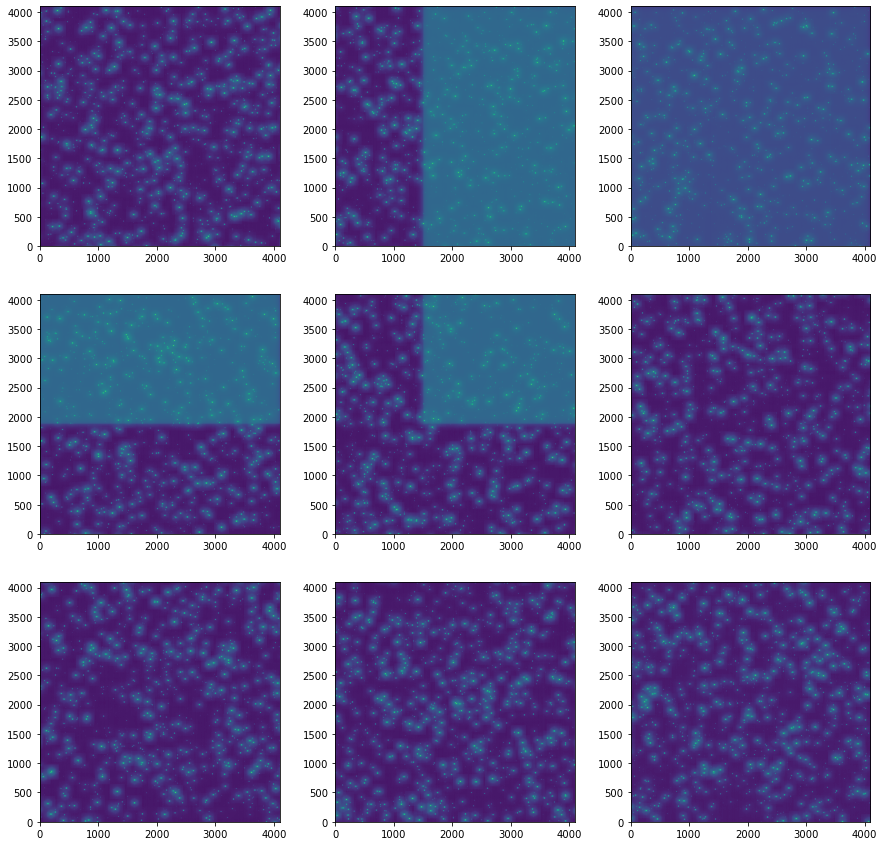

In [31]:
plt.figure(figsize=(10,10))


data = hdus[0][1].data
vmin = np.median(data) 
vmax = vmin + 10*np.std(data)
print(np.max(data))
#plt.imshow(data, norm=LogNorm(), origin="lower")

fig = plt.figure(figsize=(15,15))


for i in range(1,10):
    pos = 330 + i
    ax = plt.subplot(pos)
    ax.imshow(hdus[0][i].data, norm=LogNorm(), origin="lower") 
